# 2nd District Demographics

In [1]:
import pandas as pd
import geopandas as gpd
from urllib.request import urlopen 
import pyarrow
import jenkspy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np
from altair import datum
import altair as alt
import altair_latimes as lat
import math 

In [2]:
# for y in range(2009,2018):
#     !censusdatadownloader --data-dir input --year {y} race tracts

In [3]:
# !censusdatadownloader --data-dir input --year 2011 race tracts
# !censusdatadownloader --data-dir input --year 2018 race tracts

In [4]:
tracts2017 = pd.read_csv('input/processed/acs5_2017_race_tracts.csv', low_memory=False, 
    dtype={'geoid': 'str','name':'object','universe':'int','universe_moe':'int','white_alone':'int',\
           'white_alone_moe':'float','black_alone':'int','black_alone_moe':'float',\
           'american_indian_and_alaska_native':'int','american_indian_and_alaska_native_moe':'float',\
           'asian_alone':'int','asian_alone_moe':'float','native_hawaiian_and_pacific_islander':'int',\
           'native_hawaiian_and_pacific_islander_moe':'float','other_alone':'int','other_alone_moe':'float',\
           'two_or_more_races':'int','two_or_more_races_moe':'float','latino_alone':'int',\
           'latino_alone_moe':'float','county':'object','state':'object','tract':'object',
          },
    usecols=['name','geoid','county','state','tract','universe','white_alone','black_alone',\
             'asian_alone','latino_alone', 'white_alone_moe','black_alone_moe',\
             'asian_alone_moe','latino_alone_moe',])\
        .dropna(axis='columns')

In [5]:
tracts2017['white_pct'] = ((tracts2017['white_alone']/tracts2017['universe'])*100).round(3)
tracts2017['black_pct'] = ((tracts2017['black_alone']/tracts2017['universe'])*100).round(3)
tracts2017['asian_pct'] = ((tracts2017['asian_alone']/tracts2017['universe'])*100).round(3)
tracts2017['latino_pct'] = ((tracts2017['latino_alone']/tracts2017['universe'])*100).round(3)

In [6]:
tracts2017[['tract_display', 'place_name', 'state_name']] = tracts2017['name'].str.split(', ', n=2, expand=True)

In [7]:
tracts17 = tracts2017[['geoid','tract','state', 'county', 'place_name', 'state_name',\
                       'universe','white_alone','white_pct','black_alone','black_pct',\
                       'asian_alone','asian_pct','latino_alone','latino_pct',\
                       'white_alone_moe','black_alone_moe','asian_alone_moe','latino_alone_moe']]

In [8]:
tracts17.loc[0]

geoid                  01071951100
tract                       951100
state                           01
county                         071
place_name          Jackson County
state_name                 Alabama
universe                      6993
white_alone                   6446
white_pct                   92.178
black_alone                     55
black_pct                    0.787
asian_alone                     33
asian_pct                    0.472
latino_alone                    69
latino_pct                   0.987
white_alone_moe                692
black_alone_moe                 49
asian_alone_moe                 40
latino_alone_moe                84
Name: 0, dtype: object

---

In [9]:
tracts2010 = pd.read_csv('input/processed/acs5_2010_race_tracts.csv', low_memory=False, 
    dtype={'geoid': 'str','name':'object','universe':'int','universe_moe':'int','white_alone':'int',\
           'white_alone_moe':'float','black_alone':'int','black_alone_moe':'float',\
           'american_indian_and_alaska_native':'int','american_indian_and_alaska_native_moe':'float',\
           'asian_alone':'int','asian_alone_moe':'float','native_hawaiian_and_pacific_islander':'int',\
           'native_hawaiian_and_pacific_islander_moe':'float','other_alone':'int','other_alone_moe':'float',\
           'two_or_more_races':'int','two_or_more_races_moe':'float','latino_alone':'int',\
           'latino_alone_moe':'float','county':'object','state':'object','tract':'object',
          },
    usecols=['name','geoid','county','state','tract','universe','white_alone','black_alone',\
             'asian_alone','latino_alone', 'white_alone_moe','black_alone_moe',\
             'asian_alone_moe','latino_alone_moe',])\
        .dropna(axis='columns')

In [10]:
tracts2010['white_pct'] = ((tracts2010['white_alone']/tracts2010['universe'])*100).round(3)
tracts2010['black_pct'] = ((tracts2010['black_alone']/tracts2010['universe'])*100).round(3)
tracts2010['asian_pct'] = ((tracts2010['asian_alone']/tracts2010['universe'])*100).round(3)
tracts2010['latino_pct'] = ((tracts2010['latino_alone']/tracts2010['universe'])*100).round(3)

In [11]:
tracts2010[['tract_display', 'place_name', 'state_name']] = tracts2010['name'].str.split(', ', n=2, expand=True)

In [12]:
tracts10 = tracts2010[['geoid','tract','state', 'county', 'place_name', 'state_name',\
                       'universe','white_alone','white_pct','black_alone','black_pct',\
                       'asian_alone','asian_pct','latino_alone','latino_pct',\
                       'white_alone_moe','black_alone_moe','asian_alone_moe','latino_alone_moe']]

In [13]:
tracts10.loc[0]

geoid                 01097002900
tract                      002900
state                          01
county                        097
place_name          Mobile County
state_name                Alabama
universe                     3622
white_alone                  1813
white_pct                  50.055
black_alone                  1513
black_pct                  41.773
asian_alone                     0
asian_pct                       0
latino_alone                  215
latino_pct                  5.936
white_alone_moe               280
black_alone_moe               379
asian_alone_moe               119
latino_alone_moe              175
Name: 0, dtype: object

---

In [14]:
tracts10ca = tracts10[tracts10.state_name == 'California']
tracts17ca = tracts17[tracts17.state_name == 'California']

In [15]:
tracts10la = tracts10[tracts10.place_name == 'Los Angeles County']
tracts17la = tracts17[tracts17.place_name == 'Los Angeles County']

In [16]:
# There should be 8,057 in CA, and 2,346 in LA
len(tracts17ca)

8057

In [17]:
# There should be 8,057 in CA, and 2,346 in LA
len(tracts10la)

2346

In [18]:
tracts10la.to_csv('output/tracts10la.csv')
tracts17la.to_csv('output/tracts17la.csv')

In [19]:
tracts10ca.to_csv('output/tracts10ca.csv')
tracts17ca.to_csv('output/tracts17ca.csv')

---

### Merge different years in L.A.

In [20]:
merged = tracts10ca.merge(tracts17ca, on='geoid')

In [21]:
merged.columns = ['geoid', 'tract10', 'state10', 'county10', 'place_name10',
       'state_name10', 'universe10', 'white_alone10', 'white_pct10',
       'black_alone10', 'black_pct10', 'asian_alone10', 'asian_pct10',
       'latino_alone10', 'latino_pct10', 'white_alone_moe_10',
       'black_alone_moe_10', 'asian_alone_moe_10', 'latino_alone_moe_10',
        'tract17', 'state17', 'county17', 'place_name17', 'state_name17', 'universe17', 'white_alone17',
       'white_pct17', 'black_alone17', 'black_pct17', 'asian_alone17',
       'asian_pct17', 'latino_alone17', 'latino_pct17','white_alone_moe_17', 'black_alone_moe_17',
       'asian_alone_moe_17', 'latino_alone_moe_17']

In [22]:
merged['black_change'] = ((( merged['black_alone17']-merged['black_alone10'] ) \
                           / merged['black_alone10'])*100).round(2)\
                            .replace([np.inf, -np.inf], np.nan).fillna('0').astype(int)

In [23]:
merged['white_change'] = ((( merged['white_alone17']-merged['white_alone10'] ) \
                           / merged['white_alone10'])*100).round(2)\
                            .replace([np.inf, -np.inf], np.nan).fillna('0').astype(int)

In [24]:
merged['latino_change'] = ((( merged['latino_alone17']-merged['latino_alone10'] ) \
                           / merged['latino_alone10'])*100).round(2)\
                            .replace([np.inf, -np.inf], np.nan).fillna('0').astype(int)

In [25]:
merged['asian_change'] = ((( merged['asian_alone17']-merged['asian_alone10'] ) \
                           / merged['asian_alone10'])*100).round(2)\
                            .replace([np.inf, -np.inf], np.nan).fillna('0').astype(int)

In [26]:
merged.dtypes

geoid                   object
tract10                 object
state10                 object
county10                object
place_name10            object
state_name10            object
universe10               int64
white_alone10            int64
white_pct10            float64
black_alone10            int64
black_pct10            float64
asian_alone10            int64
asian_pct10            float64
latino_alone10           int64
latino_pct10           float64
white_alone_moe_10     float64
black_alone_moe_10     float64
asian_alone_moe_10     float64
latino_alone_moe_10    float64
tract17                 object
state17                 object
county17                object
place_name17            object
state_name17            object
universe17               int64
white_alone17            int64
white_pct17            float64
black_alone17            int64
black_pct17            float64
asian_alone17            int64
asian_pct17            float64
latino_alone17           int64
latino_p

In [27]:
merged['black_significant'] = (abs( merged.black_alone17 - merged.black_alone10) \
                               / np.sqrt(pow(merged.black_alone_moe_17, 2) \
                                           + pow(merged.black_alone_moe_10, 2))) > 1

In [28]:
len(merged)

8056

---

## Geography

In [29]:
second_district = gpd.read_file('input/district-two.geojson')

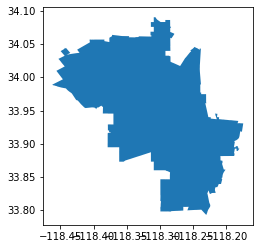

In [30]:
second_district.plot()

In [31]:
tracts_geo_2010 = gpd.read_file('input/la_county_gis_2010_tracts_demographics.geojson')

In [32]:
tracts_geo_all = tracts_geo_2010.rename(columns={"CT10": "tract"})

In [33]:
tracts = gpd.GeoDataFrame(tracts_geo_all[['tract','geometry']])

In [34]:
tracts.head()

,tract,geometry
0,911001,POLYGON ((-117.6671332452937 34.55801308359693...
1,576301,POLYGON ((-118.1850281556962 33.78260182938705...
2,670500,POLYGON ((-118.3327911797125 33.77182581960497...
3,651302,POLYGON ((-118.3544121862991 33.80635582293712...
4,575402,POLYGON ((-118.1893761568088 33.78986182983371...


In [35]:
tracts_change = tracts.merge(merged, left_on='tract', right_on='tract10')

In [36]:
tracts_change.crs = {'init':'epsg:4326'}

In [37]:
tracts_change.to_crs({'init':'epsg:4326'}).head()

,tract,geometry,geoid,tract10,state10,county10,place_name10,state_name10,universe10,white_alone10,...,latino_pct17,white_alone_moe_17,black_alone_moe_17,asian_alone_moe_17,latino_alone_moe_17,black_change,white_change,latino_change,asian_change,black_significant
0,911001,POLYGON ((-117.6671332452937 34.55801308359693...,06037911001,911001,06,037,Los Angeles County,California,3978,2590,...,40.401,318.0,203.0,16.0,582.0,43,-21,68,-85,False
1,576301,POLYGON ((-118.1850281556962 33.78260182938705...,06037576301,576301,06,037,Los Angeles County,California,3912,562,...,50.487,144.0,206.0,193.0,235.0,14,-7,-10,61,False
2,670500,POLYGON ((-118.3327911797125 33.77182581960497...,06037670500,670500,06,037,Los Angeles County,California,1808,1218,...,6.295,138.0,11.0,56.0,62.0,-35,0,-17,-27,False
3,651302,POLYGON ((-118.3544121862991 33.80635582293712...,06037651302,651302,06,037,Los Angeles County,California,6049,4132,...,12.024,384.0,6.0,155.0,199.0,0,3,-14,-19,False
4,575402,POLYGON ((-118.1893761568088 33.78986182983371...,06037575402,575402,06,037,Los Angeles County,California,3448,156,...,83.529,131.0,102.0,92.0,307.0,-48,14,35,52,True


In [38]:
tracts_change.black_significant.value_counts()

False    2124
True      321
Name: black_significant, dtype: int64

In [ ]:
tracts_change.to_file('output/tracts_change.geojson' , driver='GeoJSON')

In [ ]:
tracts_change_second = gpd.sjoin(tracts_change, second_district, how="inner", op='within')

In [ ]:
tracts_change_second.plot()

In [ ]:
tracts_change_second.columns

In [ ]:
tracts_change_second.to_file('output/tracts_change_second.geojson' , driver='GeoJSON')

In [ ]:
sig_change_black = tracts_change_second[tracts_change_second['black_significant'] == True]

In [ ]:
len(sig_change_black)

In [ ]:
tracts_change_slim = tracts_change_second[['tract','geoid','black_alone10','black_alone17','black_change'\
                                           ,'white_change','latino_change', 'black_significant']]

In [ ]:
tracts_change_slim.to_csv('output/tracts_change_slim.csv')
sig_change_black.to_csv('output/sig_change_black.csv')

In [ ]:
tracts_change_slim.sort_values(by='black_change', ascending=False).head(20)